In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
from lbow.steadystate import ChannelModel

# Analytical solution for a trapped wave

This notebook shows the semi-analytical solution of uniform, stratified flow over a bell-shaped hill in the presence of an artificial rigid lid at a given height, causing spurious downward wave reflections. The setup is reminiscent of numerical simulations of buoyancy waves with inadequate boundary conditions at the top of the numerical domain. The semi-analytical solution is obtained with LBoW, which solves linear theory of buoyancy waves.

Created by Dries Allaerts

Flow parameters

In [3]:
U = 10   # Wind speed [m/s]
N = 0.005 # Brunt-Vaisala frequency [1/s]
H = 7000 # Height of the rigid lid [m]

Hill shape

In [4]:
L = 1000.0   # Characteristic width of the hill [m]
hmax = 100.0 # Height of the hill [m]

# Shape function of the hill
h = lambda x: hmax/(1+(x/L)**2)

Numerical parameters

In [5]:
Lx = 2000.0e3 # Length of the numerical domain [m]
Nx = int(1e5) # Number of grid points

Parameters for visualization

In [6]:
Lz = H   # Height up to which solution is calculated [m]
Nz = 101 # Number of vertical levels to be used

## Solve flow problem

Create numerical grid

In [7]:
xs,dx = np.linspace(-Lx/2,Lx/2,Nx,endpoint=False,retstep=True)
print('Horizontal grid resolution is {} m'.format(dx))

Horizontal grid resolution is 20.0 m


In [8]:
zs,dz = np.linspace(0,Lz,Nz,retstep=True)
print('Vertical resolution is {} m'.format(dz))

Vertical resolution is 70.0 m


In [9]:
model = ChannelModel(xs,h(xs),U,N,H)

In [10]:
%%time
eta = model.solve('eta',zs)
w = model.solve('w',zs)
u = model.solve('u',zs)
p = model.solve('p',zs)

CPU times: user 4.06 s, sys: 1.38 s, total: 5.44 s
Wall time: 10.2 s


## Visualization

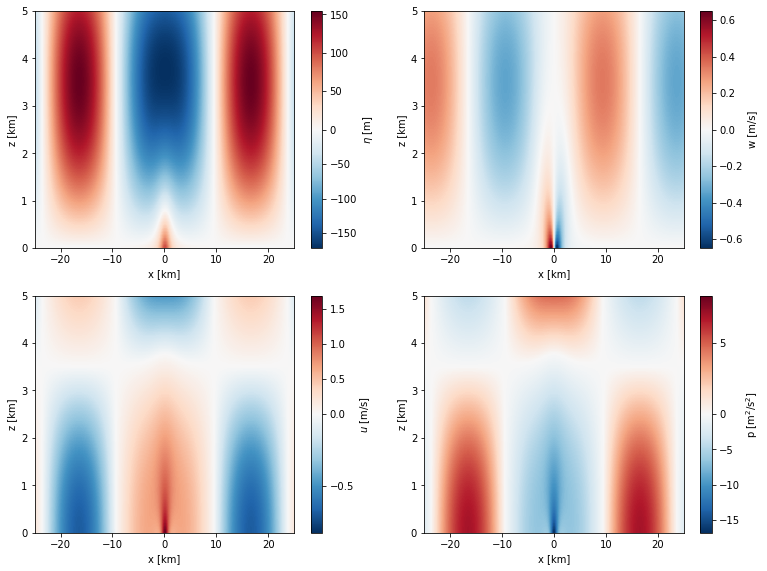

In [11]:
f,ax=plt.subplots(2,2,figsize=(12.8,9.6))
im=ax[0,0].imshow(eta.T,
             origin='lower',
             extent=[xs[0]/1e3, xs[-1]/1e3, zs[0]/1e3, zs[-1]/1e3],
             aspect='auto',
             cmap='RdBu_r',
             norm=TwoSlopeNorm(vcenter=0.))
cbar = f.colorbar(im,ax=ax[0,0],shrink=1.0,label=r'$\eta$ [m]')
_ = ax[0,0].set(xlim=[-25,25],ylim=[0,5],xlabel='x [km]',ylabel='z [km]')

im=ax[0,1].imshow(w.T,
             origin='lower',
             extent=[xs[0]/1e3, xs[-1]/1e3, zs[0]/1e3, zs[-1]/1e3],
             aspect='auto',
             cmap='RdBu_r',
             norm=TwoSlopeNorm(vcenter=0.))
# figure mark-up
cbar = f.colorbar(im,ax=ax[0,1],shrink=1.0,label='w [m/s]')
_ = ax[0,1].set(xlim=[-25,25],ylim=[0,5],xlabel='x [km]',ylabel='z [km]')

im=ax[1,0].imshow(u.T,
             origin='lower',
             extent=[xs[0]/1e3, xs[-1]/1e3, zs[0]/1e3, zs[-1]/1e3],
             aspect='auto',
             cmap='RdBu_r',
             norm=TwoSlopeNorm(vcenter=0.))
cbar = f.colorbar(im,ax=ax[1,0],shrink=1.0,label=r'$u$ [m/s]')
_ = ax[1,0].set(xlim=[-25,25],ylim=[0,5],xlabel='x [km]',ylabel='z [km]')

im=ax[1,1].imshow(p.T,
             origin='lower',
             extent=[xs[0]/1e3, xs[-1]/1e3, zs[0]/1e3, zs[-1]/1e3],
             aspect='auto',
             cmap='RdBu_r',
             norm=TwoSlopeNorm(vcenter=0.))
# figure mark-up
cbar = f.colorbar(im,ax=ax[1,1],shrink=1.0,label=r'p [m$^2$/s$^2$]')
_ = ax[1,1].set(xlim=[-25,25],ylim=[0,5],xlabel='x [km]',ylabel='z [km]')

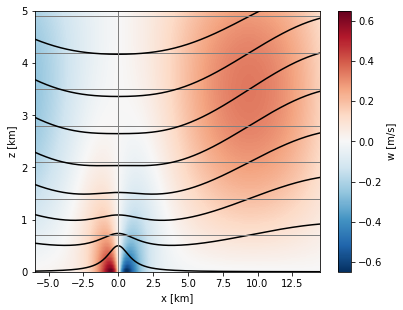

In [12]:
f,ax=plt.subplots(1,1,figsize=(6.4,4.8))
# background image showing vertical velocity contours
im=ax.imshow(w.T,
             origin='lower',
             extent=[xs[0]/1e3, xs[-1]/1e3, zs[0]/1e3, zs[-1]/1e3],
             aspect='auto',
             cmap='RdBu_r',
             norm=TwoSlopeNorm(vcenter=0.))
# streamlines (vertical displacement scaled by a factor 5 for visibility)
for kz in range(0,Nz,10):
    ax.plot(xs/1e3,5*eta[:,kz]/1e3+zs[kz]/1e3,'k',linewidth=1.5)
    ax.axhline(zs[kz]/1e3,color='gray',linewidth=1)
ax.axvline(0,color='gray',linewidth=1)
# figure mark-up
cbar = f.colorbar(im,ax=ax,shrink=1.0,label='w [m/s]')
_ = ax.set(xlim=[-6,14.5],ylim=[0,5],xlabel='x [km]',ylabel='z [km]')